#### Data preparation


In [11]:
import numpy as np


np.random.seed(42)

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
dataset = load_breast_cancer()

x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
print(f"x_train shape: {x_train.shape} x_test.shape: {x_test.shape}")
print(f"x: {x[:3]}")

x_train shape: (455, 30) x_test.shape: (114, 30)
x: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


#### Cross Validation


In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
def print_cv_results(scores: list[float]) -> tuple[float, float]:
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"Accuracies:\n{scores}")
    print(f"Mean Score: {mean_score}")
    print(f"Std Score: {std_score}")
    return mean_score, std_score

In [17]:
def plot_cv_results(scores: list[float], mean_score: float) -> None:
    plt.axhline(mean_score, linestyle="-", color="red")
    plt.plot(range(len(scores)), scores, color="blue")
    plt.xlim(0, len(scores) - 1)
    plt.ylim(0.85, 1)
    plt.legend(["Validation Scores", "Mean Score"])
    plt.show()

Accuracies:
[0.94505495 0.87912088 0.97802198 0.9010989  0.9010989 ]
Mean Score: 0.9208791208791208
Std Score: 0.03571005892147674


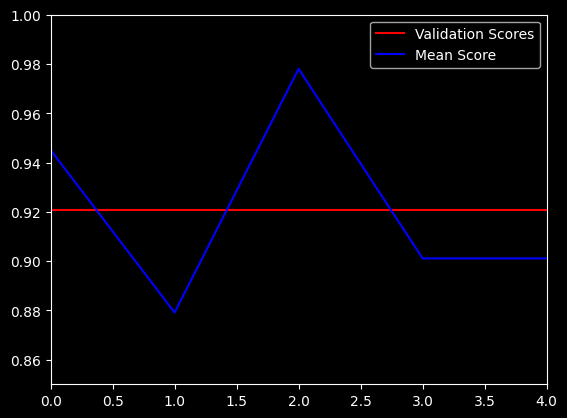

In [18]:
clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[0.92307692 0.87912088 0.9010989  0.87912088 0.92307692]
Mean Score: 0.9010989010989011
Std Score: 0.019657740461536642


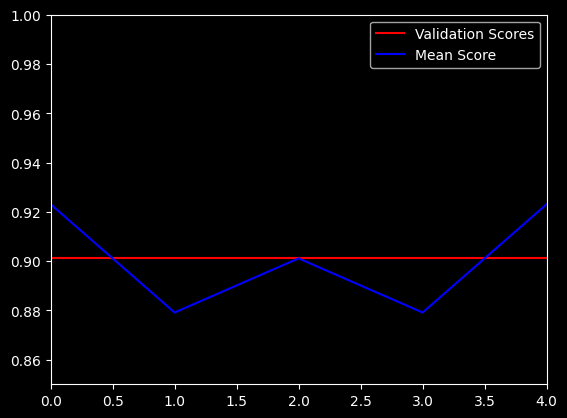

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[0.92307692 0.9010989  0.93406593 0.89010989 0.91208791]
Mean Score: 0.9120879120879121
Std Score: 0.015540808377726343


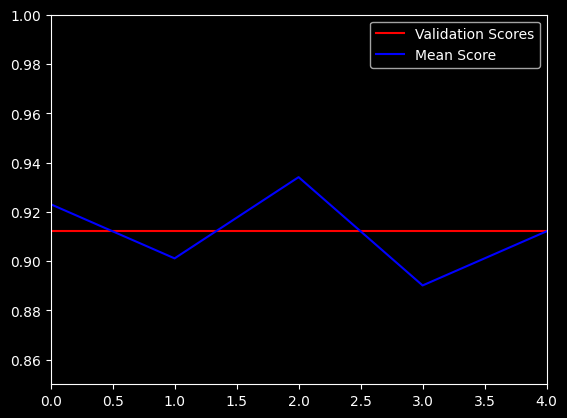

In [20]:
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)